In [1]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip, datetime
from os import listdir, walk
from os.path import isfile, join

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import Grid
%matplotlib inline

import seaborn as sns
color = sns.color_palette()

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.metrics import adjusted_rand_score
import random

'''Algos'''
from kshape.core import kshape, zscore
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import KShape, TimeSeriesKMeans
import hdbscan

C:\ProgramData\Anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [14]:
# Load the datasets
data_train = np.loadtxt("train.csv",delimiter=",")

X_train = to_time_series_dataset(data_train[:, 1:])
y_train = data_train[:, 0].astype(np.int)

data_test = np.loadtxt("test.csv",delimiter=",")
X_test = to_time_series_dataset(data_test[:, 1:])
y_test = data_test[:, 0].astype(np.int)

#data_test = np.loadtxt(current_path+file+
#                       "ECGFiveDays/ECGFiveDays_TEST", 
#                       delimiter=",")
#X_test = to_time_series_dataset(data_test[:, 1:])
#y_test = data_test[:, 0].astype(np.int)

IndentationError: unexpected indent (<ipython-input-14-6c253653bfed>, line 3)

# 【実習5】２の解析データ（心電図）
心電図のデータ（小規模）をロードする

In [3]:
# Basic summary statistics
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

Number of time series: 23
Number of unique classes: 2
Time series length: 136


In [4]:
# Number of examples in each class in the training set
print("Number of time series in class 1.0:", 
      len(data_train[data_train[:,0]==1.0]))
print("Number of time series in class 2.0:", 
      len(data_train[data_train[:,0]==2.0]))

Number of time series in class 1.0: 14
Number of time series in class 2.0: 9


Plot  0  Class  1.0


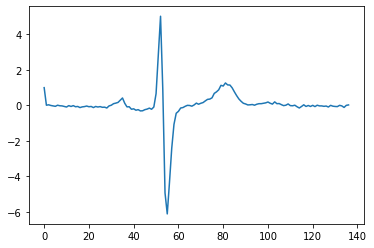

Plot  1  Class  1.0


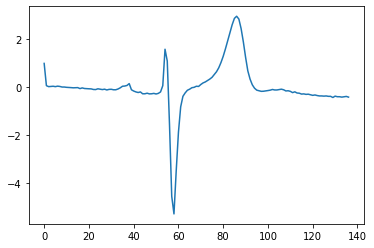

Plot  4  Class  1.0


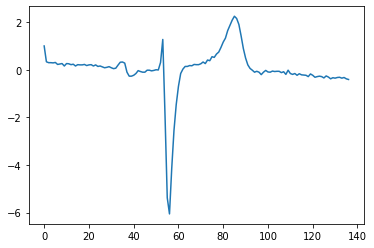

Plot  7  Class  1.0


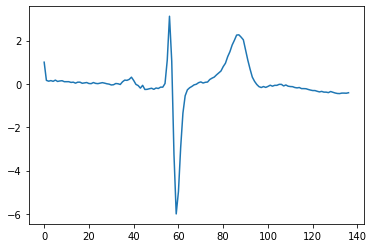

Plot  9  Class  1.0


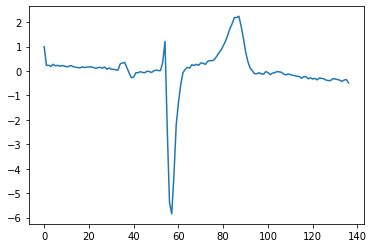

In [5]:
for i in range(0,10):
    if data_train[i,0]==1.0:
        print("Plot ",i," Class ",data_train[i,0])
        plt.plot(data_train[i])
        plt.show()

# 【実習6】Kmeans（K平均法）
心電図（大規模データ）で実行

In [6]:
import numpy as np

data_train = np.loadtxt("ECG5000_TRAIN", delimiter=",")

data_test = np.loadtxt("ECG5000_TEST", delimiter=",")

data_joined = np.concatenate((data_train,data_test),axis=0)
data_train, data_test = train_test_split(data_joined, 
                                    test_size=0.20, random_state=2019)

X_train = to_time_series_dataset(data_train[:, 1:])
y_train = data_train[:, 0].astype(np.int)
X_test = to_time_series_dataset(data_test[:, 1:])
y_test = data_test[:, 0].astype(np.int)

In [7]:
# Summary statistics
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

Number of time series: 4000
Number of unique classes: 5
Time series length: 140


In [8]:
# Calculate number of readings per class
print("Number of time series in class 1.0:", 
      len(data_train[data_train[:,0]==1.0]))
print("Number of time series in class 2.0:", 
      len(data_train[data_train[:,0]==2.0]))
print("Number of time series in class 3.0:", 
      len(data_train[data_train[:,0]==3.0]))
print("Number of time series in class 4.0:", 
      len(data_train[data_train[:,0]==4.0]))
print("Number of time series in class 5.0:", 
      len(data_train[data_train[:,0]==5.0]))

Number of time series in class 1.0: 2327
Number of time series in class 2.0: 1423
Number of time series in class 3.0: 75
Number of time series in class 4.0: 156
Number of time series in class 5.0: 19


 Class  1.0  Count  2327


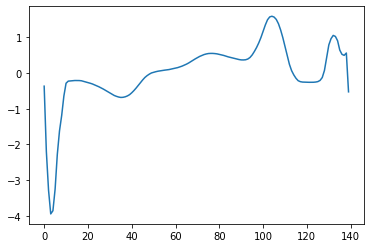

 Class  2.0  Count  1423


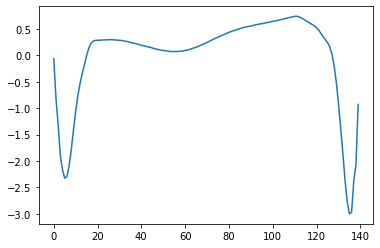

 Class  3.0  Count  75


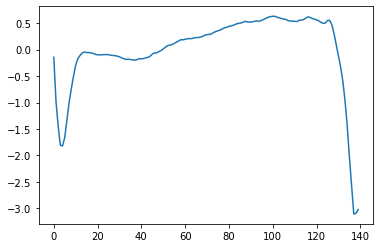

 Class  4.0  Count  156


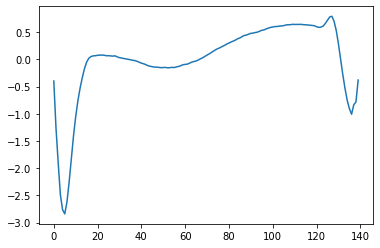

 Class  5.0  Count  19


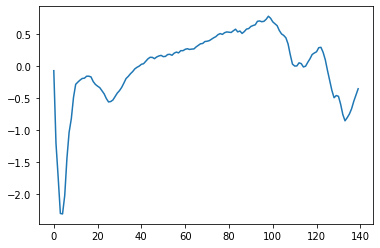

In [9]:
# Display readings from each class
for j in np.unique(data_train[:,0]):
    dataPlot = data_train[data_train[:,0]==j]
    cnt = len(dataPlot)
    dataPlot = dataPlot[:,1:].mean(axis=0)
    print(" Class ",j," Count ",cnt)
    plt.plot(dataPlot)
    plt.show()

In [10]:
# Prepare data - Scale
X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_train)
X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_test)

In [11]:
# Train using Time Series k-Means
km = TimeSeriesKMeans(n_clusters=5, max_iter=100, n_init=100, \
                      metric="euclidean", verbose=1, random_state=2019)
km.fit(X_train)

Init 1
36.241 --> 27.298 --> 26.273 --> 25.556 --> 25.120 --> 24.911 --> 24.831 --> 24.815 --> 24.813 --> 24.812 --> 24.812 --> 24.812 --> 24.812 --> 
Init 2
37.226 --> 25.264 --> 24.680 --> 24.430 --> 24.296 --> 24.202 --> 24.155 --> 24.136 --> 24.128 --> 24.124 --> 24.121 --> 24.119 --> 24.118 --> 24.117 --> 24.117 --> 24.117 --> 24.117 --> 24.116 --> 24.116 --> 24.116 --> 24.116 --> 24.115 --> 24.115 --> 24.115 --> 24.114 --> 24.113 --> 24.112 --> 24.111 --> 24.110 --> 24.109 --> 24.108 --> 24.108 --> 24.108 --> 
Init 3
33.738 --> 25.341 --> 25.014 --> 24.795 --> 24.664 --> 24.623 --> 24.616 --> 24.615 --> 24.614 --> 24.614 --> 24.614 --> 
Init 4
30.531 --> 24.956 --> 24.740 --> 24.663 --> 24.629 --> 24.615 --> 24.603 --> 24.595 --> 24.585 --> 24.567 --> 24.560 --> 24.559 --> 24.559 --> 24.559 --> 24.559 --> 24.559 --> 24.559 --> 
Init 5
34.030 --> 25.598 --> 25.398 --> 25.344 --> 25.310 --> 25.277 --> 25.236 --> 25.159 --> 25.005 --> 24.834 --> 24.725 --> 24.666 --> 24.636 --> 24.6

36.365 --> 25.804 --> 24.971 --> 24.693 --> 24.548 --> 24.483 --> 24.440 --> 24.403 --> 24.369 --> 24.331 --> 24.288 --> 24.241 --> 24.184 --> 24.135 --> 24.099 --> 24.082 --> 24.071 --> 24.059 --> 24.047 --> 24.040 --> 24.034 --> 24.027 --> 24.021 --> 24.017 --> 24.015 --> 24.014 --> 24.013 --> 24.012 --> 24.012 --> 24.012 --> 24.012 --> 24.012 --> 24.012 --> 24.011 --> 24.011 --> 24.011 --> 24.011 --> 24.011 --> 24.011 --> 24.011 --> 
Init 25
35.882 --> 25.390 --> 24.900 --> 24.715 --> 24.656 --> 24.635 --> 24.624 --> 24.617 --> 24.612 --> 24.611 --> 24.610 --> 24.610 --> 24.610 --> 24.610 --> 24.610 --> 24.610 --> 
Init 26
43.128 --> 26.938 --> 26.378 --> 26.109 --> 25.736 --> 25.289 --> 25.034 --> 24.918 --> 24.868 --> 24.847 --> 24.839 --> 24.837 --> 24.837 --> 24.837 --> 24.837 --> 
Init 27
34.117 --> 25.676 --> 25.328 --> 25.086 --> 24.843 --> 24.646 --> 24.495 --> 24.387 --> 24.309 --> 24.244 --> 24.184 --> 24.145 --> 24.129 --> 24.122 --> 24.120 --> 24.118 --> 24.117 --> 24.11

31.995 --> 26.409 --> 26.223 --> 26.084 --> 25.908 --> 25.709 --> 25.519 --> 25.283 --> 25.122 --> 25.002 --> 24.931 --> 24.881 --> 24.845 --> 24.824 --> 24.810 --> 24.796 --> 24.785 --> 24.778 --> 24.768 --> 24.756 --> 24.745 --> 24.732 --> 24.722 --> 24.710 --> 24.692 --> 24.671 --> 24.648 --> 24.624 --> 24.606 --> 24.594 --> 24.589 --> 24.587 --> 24.585 --> 24.583 --> 24.582 --> 24.579 --> 24.577 --> 24.574 --> 24.572 --> 24.570 --> 24.569 --> 24.568 --> 24.567 --> 24.566 --> 24.566 --> 24.565 --> 24.565 --> 24.565 --> 24.565 --> 24.565 --> 24.565 --> 
Init 50
31.104 --> 25.217 --> 24.696 --> 24.446 --> 24.321 --> 24.254 --> 24.212 --> 24.193 --> 24.183 --> 24.175 --> 24.164 --> 24.150 --> 24.131 --> 24.118 --> 24.113 --> 24.110 --> 24.109 --> 24.109 --> 24.109 --> 24.109 --> 24.108 --> 24.108 --> 24.108 --> 24.108 --> 24.108 --> 
Init 51
35.292 --> 26.296 --> 25.382 --> 24.928 --> 24.560 --> 24.369 --> 24.268 --> 24.206 --> 24.158 --> 24.126 --> 24.102 --> 24.079 --> 24.058 --> 24.

33.231 --> 24.812 --> 24.285 --> 24.151 --> 24.114 --> 24.087 --> 24.065 --> 24.047 --> 24.033 --> 24.026 --> 24.023 --> 24.020 --> 24.018 --> 24.017 --> 24.016 --> 24.015 --> 24.015 --> 24.015 --> 
Init 77
36.481 --> 26.722 --> 25.798 --> 25.549 --> 25.409 --> 25.329 --> 25.272 --> 25.232 --> 25.201 --> 25.173 --> 25.153 --> 25.142 --> 25.135 --> 25.129 --> 25.124 --> 25.119 --> 25.113 --> 25.108 --> 25.103 --> 25.100 --> 25.099 --> 25.098 --> 25.097 --> 25.095 --> 25.094 --> 25.093 --> 25.092 --> 25.092 --> 25.091 --> 25.091 --> 25.091 --> 25.091 --> 25.091 --> 25.091 --> 
Init 78
33.536 --> 24.791 --> 24.567 --> 24.469 --> 24.383 --> 24.281 --> 24.212 --> 24.169 --> 24.153 --> 24.141 --> 24.131 --> 24.124 --> 24.120 --> 24.118 --> 24.115 --> 24.114 --> 24.114 --> 24.113 --> 24.112 --> 24.110 --> 24.108 --> 24.107 --> 24.107 --> 24.107 --> 24.107 --> 24.107 --> 
Init 79
34.516 --> 24.444 --> 24.159 --> 24.129 --> 24.122 --> 24.118 --> 24.117 --> 24.117 --> 24.116 --> 24.116 --> 24.11

TimeSeriesKMeans(max_iter=100, n_clusters=5, n_init=100, random_state=2019,
                 verbose=1)

In [12]:
# Predict on training set and evaluate using adjusted Rand index
preds = km.predict(X_train)
ars = adjusted_rand_score(data_train[:,0],preds)
print("Adjusted Rand Index of Time Series k-Means on Training Set:", ars)

Adjusted Rand Index of Time Series k-Means on Training Set: 0.5063464656715959


In [13]:
# Predict on test set and evaluate using adjusted Rand index
preds_test = km.predict(X_test)
ars = adjusted_rand_score(data_test[:,0],preds_test)
print("Adjusted Rand Index of Time Series k-Means on Test Set:", ars)

Adjusted Rand Index of Time Series k-Means on Test Set: 0.4864981997585834
